# Roadmap

Este trabalho tem objetivo de predizer a probabilidade de um equipamento falhar dado o momento atual deste equipamento. Para tal, separamos este trabalho nas seguintes partes:



1.   Análise exploratória de dados
2.   Formulação de hipótes
3.   Salvando nosso modelo para persistência
4.   Interpretação dos nossos modelos

 # Análise exploratória de dados

Em um primeiro momento, esta analise exploratória é feito passo por passo, para demonstrar o storyteller. Mas pensando em escalabilidade e na esteira de implantação do modelo aqui proposto, é necessário reduzir esta análise em alguns passos e encaplulá-la.

### Carregando os dados

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Nome das colunas do df pandas
columns = ['Asset id', 'runtime']\
          + ['Setting'+ str(x) for x in range(1, 4)]\
          + ['Tag'+ str(x) for x in range(1, 22)]

In [4]:
len(columns)

26

In [6]:
# Dataframe para treinamento do modelo
df = pd.read_csv('PM_train.txt', sep=" ", header=None)

In [7]:
# Note que o df de treinamento possui 2 colunas a mais do que nossa lista de columns
df.shape

(20631, 28)

In [8]:
# Fazendo uma inspeção visual simples
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


### Procurando por valores faltantes

In [9]:
# Por uma inspeção mais detalhada verificamos que as colunas '26' e '27'
# são todas nulas, logo podemos retirá-las. Além disso, as outras colunas não possuem
# missings.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [10]:
# Retirando as colunas com valores nulos '26' e '27'
df.drop(columns=[26, 27], inplace=True)

In [11]:
# Agora como o número de colunas coincide com nossa lista de colunas
df.shape[1], len(columns)

(26, 26)

In [12]:
# Renomeando as colunas do df
df.columns = columns

### Analisando as estatísticas básicas

In [13]:
# Analisando as estatísticas básicas do df 
df.describe()

,Asset id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


<Figure size 432x288 with 0 Axes>

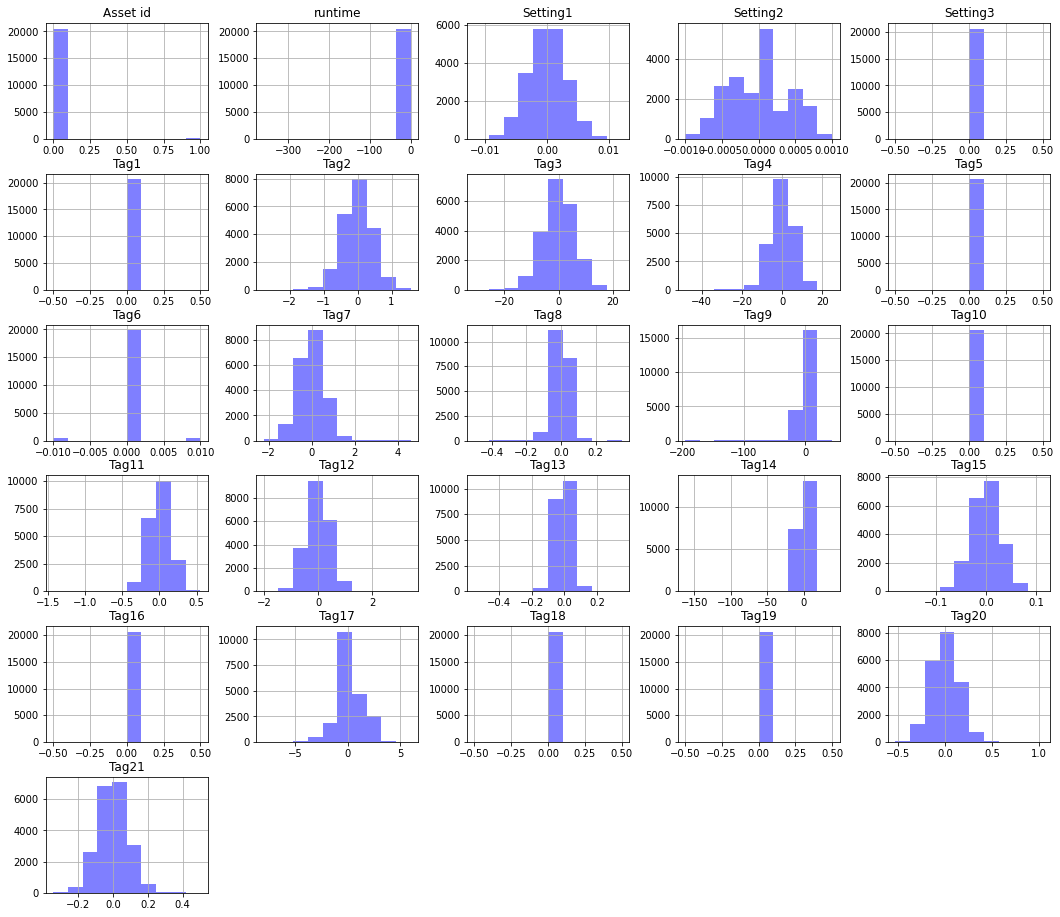

In [14]:
# Análise visual das distribuições de freq dos atributos
import matplotlib.pyplot as plt 
plt.figure()
df.diff().hist(color='b', alpha=0.5, figsize=(18, 16));

In [15]:
# Analisando asestatísticas básicas e os gráficos acima obtemos que algumas colunas como por exemplo 'Setting3' são constantes para 
# todos os id's, logo podemos retirálas.
df2 = df.drop(columns='Asset id').diff().astype(str)
drop_columns_list = [col for col in df2.columns if set(df2[col])=={'nan', '0.0'}]
df.drop(columns=drop_columns_list, inplace=True)

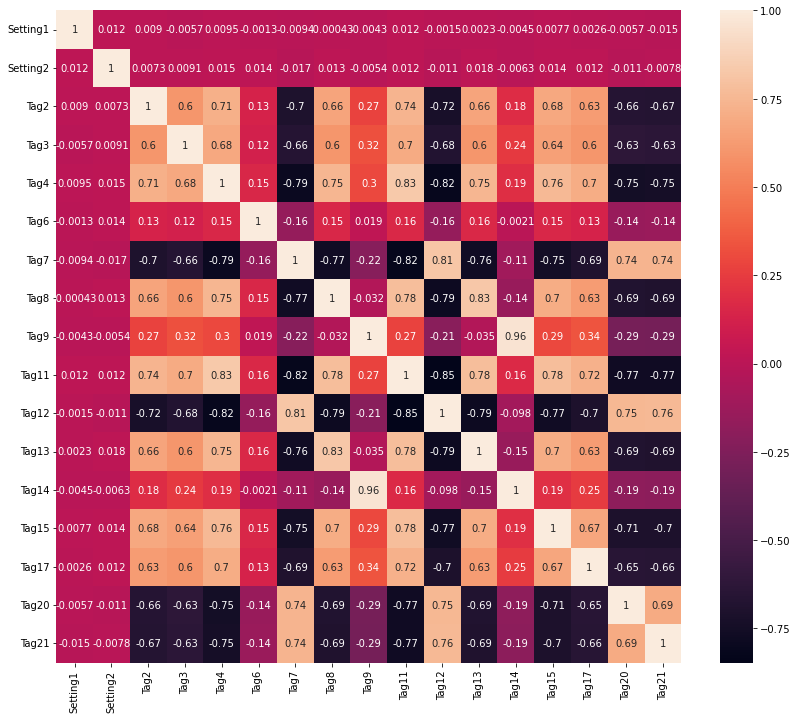

In [18]:
# Note que existem features fortemente correlacionadas, algo que sugere ainda uma possível criação de variável
# de maneira que nosso range de features seja ainda menor
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(df.drop(columns=['Asset id', 'runtime']).corr(method='pearson'), annot = True);

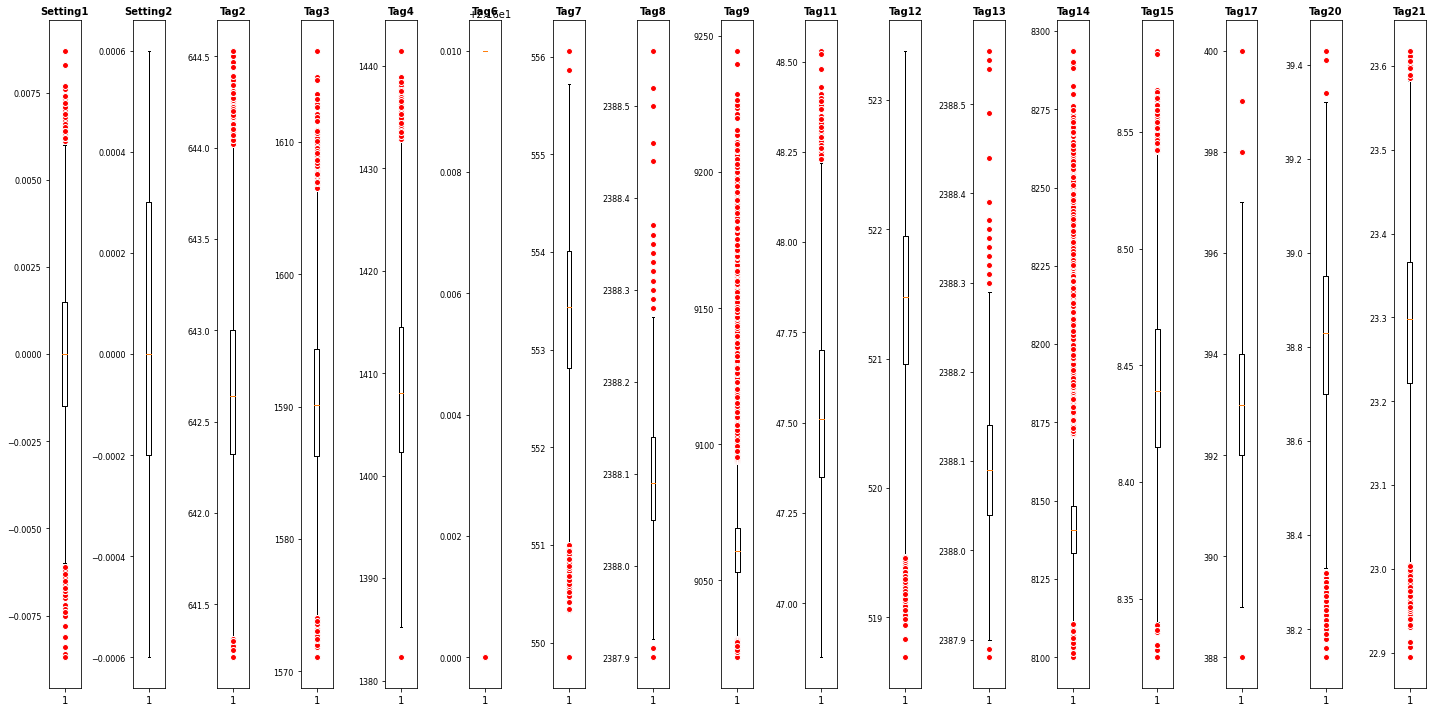

In [19]:
# Analisando as features que restaram no nosso df observamos que a maioria possui outliers 
# A princípio poderíamos usar o Z-score, por exemplo, para retirar os outliers porém tal decisão
# pode impactar na determinação dos momentos de falha por isso escolhemos não fazê-lá.
df2 = df.drop(columns=['Asset id', 'runtime'])
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df2.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df2.iloc[:,i], flierprops=red_circle)
    ax.set_title(df2.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=8)
    
plt.tight_layout()

### Teste de distribuição das features restantes



In [20]:
from scipy import stats

In [21]:
def dist_normal_test(df=df, alpha = 5/100):

    '''Recebe um df pandas e testa a hipótese nula, isto é, a features possuí distribuição próxima a normal? 
       O nível de significancia alpha por defaut é 5% mas pode ser alterado segundo o grau de confiabilidade do usuário.
    '''

    dict_hip = {}
    if df.shape[0]:
        for col in df.columns:
            k2, p = stats.normaltest(df[col])
            if p < alpha:
                dict_hip[col] = 'Rejeitar hipótese nula'
            else:
                dict_hip[col] = 'Hipótese nula não pode ser rejeitada'   

        return pd.DataFrame.from_dict(dict_hip, orient='index').reset_index()\
                            .rename(columns={'index': 'Colunas_df', 0: 'Resultado_teste_H0'})        
    
    else:
        raise Exception("O dataframe disponibilizado está vazio!")

In [22]:
# É necessário uma atenção especial no nosso dataframe pois a grande maioria das
# features não possui distribuição normal além dos grandes números de outliers
dist_normal_test(df.drop(columns=['Asset id', 'runtime']))

,Colunas_df,Resultado_teste_H0
0,Setting1,Hipótese nula não pode ser rejeitada
1,Setting2,Rejeitar hipótese nula
2,Tag2,Rejeitar hipótese nula
3,Tag3,Rejeitar hipótese nula
4,Tag4,Rejeitar hipótese nula
5,Tag6,Rejeitar hipótese nula
6,Tag7,Rejeitar hipótese nula
7,Tag8,Rejeitar hipótese nula
8,Tag9,Rejeitar hipótese nula
9,Tag11,Rejeitar hipótese nula


# Formulação de hipóteses

Vamos supor que as features 'Setting1', 'Setting2', 'Tag2', 'Tag3', 'Tag4',
'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag14',
'Tag15', 'Tag17', 'Tag20', 'Tag21' que compoem nosso dataframe são dados de sensores por exemplo. Estes dados são coletados a cada hora até a falha. Na coluna 'runtime' determinamos as horas de funcionamento de equipamento e na coluna "Asset id" temos o código de identificação do equipamento. Nesta seção vamos criar a feature RUL - Remaining useful life. Está feature determina quantos horas faltam para falha do nosso equipamento. Assim, a coluna RUL, para cada equipamento, será a diferença entre o tempo máximo de funcionamento antes da falha e o momento atual do equipamento para os dados de treino. Vamos definir dois momentos para nosso case:

$$w_0 = 20 \: \mbox{horas}$$

$$w_1 = 30 \: \mbox{horas}$$

onde $w0$ representa que o equipamento falhará com 20 horas ou menos e $w_1$ representa que o equipamento falhará com 30 horas ou menos. Usaremos estes dois números como uma margem e segurança, isto é, $w_1$ o primeiro ponto de atenção com o equipamento e neste caso já se deve preparar a manuntenção do mesmo, e $w_0$ representa o último estágio antes da falha, neste caso o equipamento deve ser encaminho logo para a manuntenção. Vamos criar a coluna 'classe' no nosso dataframe determinando '0' para RUL fora da margem $w_1$ e $w_0$, '1' para determinar que o RUL do equipamento entrou na margem $w_1$, e '2' para equipamentos dentro da margem $w_0$.

### Modelo para determinação de RUL
Nesta seção criaremos os modelos para predição de RUL's para cada um dos equipamentos.

In [23]:
# Criação da coluna RUL
list_asset_id = list(set(df['Asset id']))
dict_max_time = {asset_id: df[df['Asset id']==asset_id]\
                      .runtime.max() for asset_id in list_asset_id}
                      
df['RUL'] = [dict_max_time[asset_id]-x for asset_id in dict_max_time.keys() for x in df[df['Asset id']==asset_id].runtime]                      

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
scaler = StandardScaler()

In [26]:
df_teste = pd.read_csv('PM_test.txt', sep=" ", header=None)

In [27]:
def df_test_transformer(df_teste=df_teste):
    df_teste.drop(columns=[26, 27], inplace=True)
    df_teste.columns = columns
    df_teste.drop(columns=drop_columns_list, inplace=True)
    # Criação da coluna RUL
    list_asset_id = list(set(df_teste['Asset id']))
    dict_max_time = {asset_id: df_teste[df_teste['Asset id']==asset_id]\
                          .runtime.max() for asset_id in list_asset_id}
                          
    df_teste['RUL'] = [dict_max_time[asset_id]-x for asset_id in dict_max_time.keys()\
                                    for x in df_teste[df_teste['Asset id']==asset_id].runtime]   

    return  df_teste                                                  

In [28]:
df_teste = df_test_transformer(df_teste)

In [29]:
def asset_rul_model(asset_id=1, show_metrics=False):
    ''' Esta função recebe como parametro o asset_id que é um
        inteiro no intervalo [1, 100]. E retorna as métricas 
        da regressão que aproxima a curva de RUL do equipamento,
        além do modelo para predição de RUL.
    '''

    if asset_id in [x for x in range(1,101)]:

        X_train = df[df['Asset id']==asset_id].drop(columns=['RUL'])
        y_train = df[df['Asset id']==asset_id].RUL

        X_test = df_teste[df_teste['Asset id']==asset_id].drop(columns=['RUL'])
        y_test = df_teste[df_teste['Asset id']==asset_id].RUL

        X_train_scaler = scaler.fit_transform(X_train.drop(columns=['Asset id']))
        y_train_scaler = scaler.fit_transform(y_train.values.reshape(-1, 1))

        X_test_scaler = scaler.fit_transform(X_test.drop(columns=['Asset id']))
        y_test_scaler = scaler.fit_transform(y_test.values.reshape(-1, 1))

        reg1 = GradientBoostingRegressor(random_state=42)
        reg2 = RandomForestRegressor(random_state=42)
        reg3 = LinearRegression()
        reg4 = KNeighborsRegressor()

        ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3), ('knr', reg4)], n_jobs=-1)
        ereg.fit(X_train_scaler, y_train_scaler)

        if show_metrics:

            return ereg, {'Erro quadrático médio teste': mean_squared_error(y_test_scaler, ereg.predict(X_test_scaler)),
                          'R^2': r2_score(y_test_scaler, ereg.predict(X_test_scaler)),
                          'Erro absoluto teste': mean_absolute_error(y_test_scaler, ereg.predict(X_test_scaler))
                          }

        else:
            return ereg
    else:
        raise Exception("Desculpe mas este equipamento não foi resgistrado.")

In [30]:
# # Métricas dos modelos para determinação do RUL
range_asset = [x for x in range(1,101)]
df_rul_metrics = pd.DataFrame(columns=['Asset id', 'Erro absoluto teste', 'Erro quadrático médio teste', 'R^2'])
df_rul_metrics['Asset id'] = range_asset
for asset_id in range_asset:
    model_RUL, A = asset_rul_model(asset_id, True)
    df_rul_metrics.loc[asset_id-1, 'Erro absoluto teste'] = float(A['Erro absoluto teste'])
    df_rul_metrics.loc[asset_id-1, 'Erro quadrático médio teste'] = float(A['Erro quadrático médio teste'])
    df_rul_metrics.loc[asset_id-1, 'R^2'] = float(A['R^2'])
df_rul_metrics

,Asset id,Erro absoluto teste,Erro quadrático médio teste,R^2
0,1,0.153929,0.03567,0.96433
1,2,0.161371,0.037406,0.962594
2,3,0.151947,0.035367,0.964633
3,4,0.143252,0.03109,0.96891
4,5,0.156361,0.036949,0.963051
...,...,...,...,...
95,96,0.166947,0.036717,0.963283
96,97,0.115235,0.019485,0.980515
97,98,0.10855,0.018301,0.981699
98,99,0.155918,0.034833,0.965167


In [31]:
# Médias para determinação RUL
print("Erro absoluto médio teste: %.2f" % df_rul_metrics['Erro absoluto teste'].mean())
print("Erro quadrático médio teste: %.2f" % df_rul_metrics['Erro quadrático médio teste'].mean())
print("R^2 médio teste: %.2f" % df_rul_metrics['R^2'].mean())

Erro absoluto médio teste: 0.12
Erro quadrático médio teste: 0.03
R^2 médio teste: 0.97


## Treinando o modelo de classidicação para a faixas

In [90]:
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm

In [43]:
# determinando as margens
w0 = 20
w1 = 30

In [85]:
# Determinando a coluna classe
def create_classe_feature(df=df, w0=w0, w1=w1):
    '''Recebe um df pandas e as margem de falha w0 e w1
       e cria no df a coluna classe.
    '''
    
    df.loc[df.RUL>w1, 'classe'] = str(0)
    df.loc[(w0<df.RUL)&(df.RUL<=w1), 'classe'] = str(1)
    df.loc[df.RUL<=w0, 'classe'] = str(2)
    
    return df

In [102]:
# Criando a feature no df treino
df = create_classe_feature(df)

In [103]:
# Pipe para transformar colunas específicas
scaler_features = [col for col in df.columns if col not in ['Asset id', 'runtime', 'RUL', 'classe']]
scaler_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
                                        ("scaler_features", scaler_transformer, scaler_features),
                                    ], remainder='passthrough'
                                )

In [104]:
# Construção da pipeline de classficação
pipe = Pipeline([("preprocessor", preprocessor), ('classifier', RandomForestRegressor())])

In [105]:
# Parametros para otimização do modelo e adição de mais um modelo para otimização
parameters = [
              {'classifier': [RandomForestClassifier()],
                'classifier__min_samples_leaf': [2, 3, 5],
                'classifier__max_features': ['sqrt', 'log2', 'auto'],
                'classifier__n_estimators' : [100],
                'classifier__criterion': ['gini', 'entropy'],
                'classifier__n_jobs': [-1],
                'classifier__random_state': [42]
              },
              {'classifier': [HistGradientBoostingClassifier()],
               'classifier__loss': ['auto', 'log_loss'],
               'classifier__max_iter': [10, 20, 100],
               'classifier__max_leaf_nodes': [2, 3, 5], 
               'classifier__min_samples_leaf': [1, 2],
               'classifier__learning_rate': (0.01, 0.1, 1, 10),
               'classifier__random_state': [42]
              }
            ]

In [106]:
# Vamos verificar a distribuição das classes
print("Valores absolutos classes:\n", df.classe.value_counts())
print("Valores relativos classes:\n", df.classe.value_counts()/len(df))

Valores absolutos classes:
 0    17531
2     2100
1     1000
Name: classe, dtype: int64
Valores relativos classes:
 0    0.849741
2    0.101789
1    0.048471
Name: classe, dtype: float64


In [107]:
# Como as classes estão bastante desproporcionais vamos usar a técnica de over sample
from imblearn.over_sampling import RandomOverSampler 

In [108]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df.drop(columns=['classe']), df.classe)

In [109]:
# Vamos verificar a distribuição das classes depois do balanceamento
print("Valores absolutos classes:\n", y_res.value_counts())
print("Valores relativos classes:\n", y_res.value_counts()/len(y_res))

Valores absolutos classes:
 0    17531
1    17531
2    17531
Name: classe, dtype: int64
Valores relativos classes:
 0    0.333333
1    0.333333
2    0.333333
Name: classe, dtype: float64


In [110]:
opt = BayesSearchCV(pipe, parameters, cv=3, n_jobs=-1, random_state=42)

In [111]:
%%time
# Vamos treinar o modelo de classificação sem a feature runtime, uma vez que já possuímos a RUL
opt.fit(X_res.drop(columns=['runtime']), y_res)

CPU times: total: 2min 3s
Wall time: 5min 45s


BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('scaler_features',
                                                                          Pipeline(steps=[('scaler',
                                                                                           StandardScaler())]),
                                                                          ['Setting1',
                                                                           'Setting2',
                                                                           'Tag2',
                                                                           'Tag3',
                                                                           'Tag4',
                                                                           'Tag6',
                                                                           'Tag7',
                                                                           'Tag8',
                                                                           'Tag9',
                                                                           'Tag11',
                                                                           'Tag12',
                                                                           'Tag13',
                                                                           'Tag14',
                                                                           'Tag15',
                                                                           'Tag17',
                                                                           'Tag20',
                                                                           'Tag21'])])),
                                        ('classifier',
                                         RandomForestR...
                              'classifier__random_state': [42]},
                             {'classifier': [HistGradientBoostingClassifier(max_iter=20,
                                                                            max_leaf_nodes=5,
                                                                            min_samples_leaf=1,
                                                                            random_state=42)],
                              'classifier__learning_rate': (0.01, 0.1, 1, 10),
                              'classifier__loss': ['auto', 'log_loss'],
                              'classifier__max_iter': [10, 20, 100],
                              'classifier__max_leaf_nodes': [2, 3, 5],
                              'classifier__min_samples_leaf': [1, 2],
                              'classifier__random_state': [42]}])

In [113]:
df_teste = create_classe_feature(df_teste)
X_test = df_teste.drop(columns=['runtime', 'classe'])
y_test = df_teste.classe

In [122]:
# Exibindo o report para nosso classificador no conjunto de teste
target_names = ['0', '1', '2']
print(classification_report(y_test, opt.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9996
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      2100

    accuracy                           1.00     13096
   macro avg       1.00      1.00      1.00     13096
weighted avg       1.00      1.00      1.00     13096



# Salvando nosso modelo para persistência

In [124]:
# Salvando nosso modelo para persistência
from joblib import dump, load

In [125]:
dump(opt, 'model_clr_v1.joblib') 

['model_clr_v1.joblib']

# Interpretação do nossos modelos

In [ ]:
### Dado um momento específico para um equipamento, isto é, depois de uma hora 
### (estabelecemos o 'runtime' sendo uma hora na seção de hipótesese), coletamos os dados de
### sensores do nosso equipamento. Usando nosso modelo de Regressão para previsão do RUL
### podemos determinar o RUL. Determinado o RUL usamos nosso modelo de classificação para
### determinar em qual classe se encontra naquele momento o equipamento. Note que, o modelo de classificação
### nos fornece a probalidade para cada classe. Logo, ao fazer a previsão de classe, além 
### de saber se o modelo está na classe '0', '1' ou '2', também sabemos 
### a probalidade naquele momento, do nosso equipamento está fora da margem de programar manuntenção, classe '0' 
### (mais de 30 dias de RUL),
### está dentro da margem de planejamento de manuntenção, classe '1' (menos de 30 dias de RUL),
### está dentro da margem de manuntenção emediata, classe '2' (menos de 20 dias de RUL). Vamos fazer um exemplo.

In [130]:
# Note que aqui já temos o RUL calculado então não precisaremos predizer este cálculo. Após trabalhar 
# por uma hora o uquipamento asset_id=1, possui RUL=191 horas.
asset_id_teste_cld = df.drop(columns=['runtime', 'classe']).loc[0]
asset_id_teste_cld

Asset id       1.0000
Setting1      -0.0007
Setting2      -0.0004
Tag2         641.8200
Tag3        1589.7000
Tag4        1400.6000
Tag6          21.6100
Tag7         554.3600
Tag8        2388.0600
Tag9        9046.1900
Tag11         47.4700
Tag12        521.6600
Tag13       2388.0200
Tag14       8138.6200
Tag15          8.4195
Tag17        392.0000
Tag20         39.0600
Tag21         23.4190
RUL          191.0000
Name: 0, dtype: float64

In [148]:
### O resultado para as codições acima mencionadas são:
print("A probabilidade do nosso equipamento está fora da margem manuntenção neste momento é: {}"\
                          .format(opt.predict_proba(df.drop(columns=['runtime', 'classe']))[0][0]))
print("A probabilidade do nosso equipamento necessitar de programar manuntenção neste momento é: {}"\
                          .format(opt.predict_proba(df.drop(columns=['runtime', 'classe']))[0][1]))
print("A probabilidade do nosso equipamento necessitar de manuntenção neste momento é: {}"\
                         .format(opt.predict_proba(df.drop(columns=['runtime', 'classe']))[0][2]))

### O que faz bastante sentido quando analisamos que estamos na primeira hora de funcionamento do equipamento

A probabilidade do nosso equipamento está fora da margem manuntenção neste momento é: 0.9859289269484798
A probabilidade do nosso equipamento necessitar de programar manuntenção neste momento é: 0.007035373680279113
A probabilidade do nosso equipamento necessitar de manuntenção neste momento é: 0.007035699371241033


In [156]:
# Vamos determinar a base de teste com o probabilidade em cada momento
df_teste[['Prob_not_mant', 'Prob_sch_mant', 'Prob_mant']] = opt.predict_proba(X_test).tolist()
df_teste

,Asset id,runtime,Setting1,Setting2,Tag2,Tag3,Tag4,Tag6,Tag7,Tag8,...,Tag14,Tag15,Tag17,Tag20,Tag21,RUL,classe,Prob_not_mant,Prob_sch_mant,Prob_mant
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,...,8125.55,8.4052,392,38.86,23.3735,30,1,0.007036,0.985928,0.007036
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,...,8139.62,8.3803,393,39.02,23.3916,29,1,0.007036,0.985928,0.007036
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,...,8130.10,8.4441,393,39.08,23.4166,28,1,0.007036,0.985928,0.007036
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,...,8132.90,8.3917,391,39.00,23.3737,27,1,0.007036,0.985928,0.007036
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,...,8129.54,8.4031,390,38.99,23.4130,26,1,0.007036,0.985928,0.007036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,...,8213.28,8.4715,394,38.65,23.1974,4,2,0.007036,0.007035,0.985929
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,...,8210.85,8.4512,395,38.57,23.2771,3,2,0.007036,0.007035,0.985929
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,...,8217.24,8.4569,395,38.62,23.2051,2,2,0.007036,0.007035,0.985929
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,...,8220.48,8.4711,395,38.66,23.2699,1,2,0.007036,0.007035,0.985929


In [157]:
df_teste.to_csv('base_teste_score.csv.gz')